### Includes
Here are the import all the libraries

In [1]:
%matplotlib inline
import sys
import time
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy as sc
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

mpl.style.use('seaborn-whitegrid')

## Data

In [2]:
# data
x = [1, 2, 3, 4, 5, 6, 7]
y = [0, 1, 4, 6, 6, 7, 7]

# Plot define
fontsize = 15
width = 5.5
height = 3
lim_y = 10

color = '#a13639'
xtick = r'$t_{%d}$'

### Linear Regression (LR) Extractor

In [3]:
# Linear Regression
def linear_regression(X, Y):
    reg = LinearRegression().fit([[i] for i in X], Y)
    r2 = reg.score([[i] for i in X], Y)
    ## degrees
    x = [X[0], X[len(X)-1]]
    y = list(map(lambda a: reg.predict([[a]])[0], x))
    radians = math.atan2(y[1]-y[0], x[1]-x[0])
    degrees = math.degrees(radians)   
    return x, y, r2, degrees

### Coefficient of Angle (CA) Extractor

In [4]:
# Coefficient of Angle
def coefficient_angle(X, Y):
    first = min(X)
    last = max(X)
    coefficients = []
    while first < last:
        # exist keys? (in range)
        next = first + 1
        if first in X and next in X:
            radians = math.atan2(Y[X.index(next)]-Y[X.index(first)], 1)
            degrees = math.degrees(radians)
            coefficients.append(degrees)
        first += 1
    return coefficients

# Entropy
def entropy(data):
    serie = pd.Series(data)
    p_data = serie.value_counts() / len(serie)  # calculates the probabilities
    score = sc.stats.entropy(p_data)  # input probabilities to get the entropy
    return score

### Delta Rank (DR) Extractor

In [5]:
# Delta Rank
def delta_rank(X, Y):
    first = min(X)
    last = max(X)
    deltas = []
    while first < last:
        # exist keys? (in range)
        next = first + 1
        if first in X and next in X:
            delta = Y[X.index(next)] - Y[X.index(first)]
            deltas.append(delta)
        first += 1
    return deltas

In [6]:
# Plot Basic
# -extractor = 1: LR
# -extractor = 2: CA
# -extractor = 3: DR
def plot_line(x, y, title, extractor=1):
    # Plotting Graphs
    fig, axis = plt.subplots()
    p1 = plt.plot(x, y)
    p2 = plt.scatter(x, y)
    describes=False
    
    # ex
    if(extractor == 1):
        lr = linear_regression(x, y)
        p3 = plt.plot(lr[0], lr[1], color=color)
        y = y + lr[1]
        describes = [('$\measuredangle_c$', '%.2f$^{o}$', lr[3]),
                     ('$R^2_c$', '%.2f', lr[2])]
    elif(extractor == 3):
        ca = coefficient_angle(x, y)
        describes = []
        for i in range(len(ca)):
            describes.append((r'$\theta_{c,%d}$' % (i+1), r'%2.1f$^{o}$', ca[i]))
            xi = x[i] + (x[i+1] - x[i])/2
            yi = y[i] + (y[i+1] - y[i])/2
            plt.text(xi-0.25, yi+0.4, r'$\theta_{c,%d}$' % (i+1), fontsize=fontsize-1)
    else:
        dr = delta_rank(x, y)
        high = 0
        idx_high = 0
        describes = [('$S_{\Delta_c}$', '%.2f', entropy(dr))]
        for i in range(len(dr)):
            describes.append((r'$\Delta_{c,%d}$' % (i+1), '%d', dr[i]))
            xi = x[i] + (x[i+1] - x[i])/2
            yi = y[i] + (y[i+1] - y[i])/2
            plt.text(xi-0.3, yi+0.45, r'$\Delta_{%d}$' % (i+1), fontsize=fontsize-1)
            if dr[i] > high: # identify the high
                high = dr[i]
                idx_high = i
        # high delta
        p3 = plt.plot(x[idx_high:idx_high+2], y[idx_high:idx_high+2], color=color)
    
    if(describes):
        xpos = 1.25
        ypos = 0.01
        for desc in describes:
            text, form, value = desc
            axis.text(
                xpos,
                ypos, (r'%s: ' + form) % (text, value),
                verticalalignment='bottom',
                horizontalalignment='right',
                transform=axis.transAxes,
                fontsize=fontsize - 3)
            ypos += 0.11
    # -- ticks
    plt.ylabel('Likes', fontsize=fontsize)
    plt.xlabel('Time', fontsize=fontsize)
    plt.ylim(-0.3, lim_y) # fixed by example data
    plt.xticks(x, [xtick%i for i in x])
    plt.yticks(range(0, lim_y+1, 2), range(0, lim_y+1, 2))
    # -- legend
    if(extractor == 1):
        plt.legend((p2, p3[0]), ('Likes', 'LR'), loc='upper left', bbox_to_anchor=(1, 1), fontsize=fontsize-1)
    else:
        plt.legend((p2, ), ('Likes',), loc='upper left', bbox_to_anchor=(1, 1), fontsize=fontsize-1)
    plt.text(1, 9, '%s' % title, fontsize=fontsize-1)
    plt.tick_params(axis='both', which='major', labelsize=fontsize-1)
    # -- sizes
    fig.set_size_inches(width, height)
    plt.tight_layout()
    plt.savefig('plot%s.pdf' % title, dpi=300)
    plt.show()
    
    if(extractor == 1):
        return 'R2 = %.4f' % lr[2], 'degree = %.4f' % lr[3]
    elif(extractor == 2):
        return 'delta', 'S = %.4f' % entropy(dr), dr
    else:
        return 'angle', ca

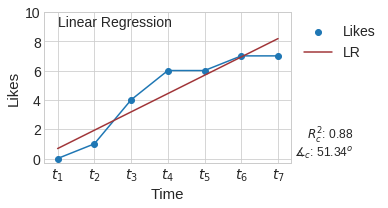

('R2 = 0.8800', 'degree = 51.3402')

In [7]:
plot_line(x, y, 'Linear Regression', extractor=1)

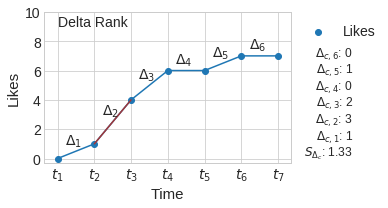

('delta', 'S = 1.3297', [1, 3, 2, 0, 1, 0])

In [8]:
plot_line(x, y, 'Delta Rank', extractor=2)

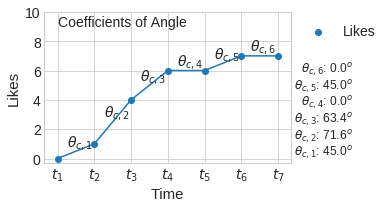

('angle', [45.0, 71.56505117707799, 63.43494882292201, 0.0, 45.0, 0.0])

In [9]:
plot_line(x, y, 'Coefficients of Angle', extractor=3)